<a href="https://colab.research.google.com/github/charles-gabriel-cc/Desafio-QuarentenaDados/blob/master/DesafioFinal_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio #QuarentenaDados

Bem-vinda e bem-vindo ao desafio #QuarentenaDados valendo um **Nintendo Switch**!

Esse notebook traz informações dos dados e como você deve configurar seu arquivo final para submissão.

**Caso queira usar esse notebook como exemplo para desenvolver seu projeto, clique em file e escolha a opção Save a copy in Drive**


Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é **diferente da apresentada em aula**. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets. 

Seu objetivo é prever da melhor forma possível a nota das provas de **linguagens e códigos** (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor **erro quadrático médio (MSE)** vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

- **dados_treino**: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

- **dados_teste**: São 20000 linhas contendo com notas das 4 provas + nota de redação.

- **dados_desafioqt**: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de **Linguagem e Codigos** (NU_NOTA_LC) não está disponível nessa base.


As base **dados_treino e dados_teste**, contém as seguintes colunas; **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC** (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a **previsão** é **NU_NOTA_LC**. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base **dados_desafioqt**, contém as seguintes colunas; **ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO**. Repare que os dados **NU_NOTA_LC** não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o **ID**, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo **ID**.

Se você está habituado com o desenvolvimento de modelos de ML, repare que essa divisão de dados é exatamente a mesma que Treino, Teste e Validação. 

Abaixo preparamos um código exemplo para você seguir, sinta-se à vontade para experimentar diversos outros métodos, mas **GARANTA QUE O ARQUIVO DE SUBMISSÃO ESTEJA CONFIGURADO CORRETAMENTE**.

Na primeira parte, estamos lendo a base de dados direto de arquivos no github.






In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

Agora com as bases de dados lidas, vamos separar as informações de cada dataset. X_treino e Y_treino são as **features**, X_teste e Y_teste são as **labels** a serem previstas.

Duas observações nesta parte:

- 1° Como já disponibilizamos os dados de treino e teste separados, você não precisa fazer *train_test_split* feito em aula (porém fique à vontade para trabalhar da forma que achar melhor).

- 2° Transformamos X_treino, Y_treino, X_teste, Y_teste em arrays numpy. Se você quiser usar uma biblioteca que não aceite dataframe como entrada de dados, já deixamos pronto para você.

In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()


#Resolução do Desafio:
Obs: Para ver o funcionamento do código basta rodar cada célula uma única vez



In [0]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dados_treino.columns = ['CN', 'CH', 'LC', 'MT', 'REDACAO']
dados_treino.head()

,CN,CH,LC,MT,REDACAO
0,530.7,586.5,575.9,539.0,520.0
1,439.4,577.9,440.9,488.7,380.0
2,414.1,548.8,417.2,382.6,600.0
3,407.9,572.7,558.9,595.4,560.0
4,617.2,655.7,564.2,660.9,540.0


In [0]:
dados_teste.columns = ['CN', 'CH', 'LC', 'MT', 'REDACAO']
dados_teste.head()

,CN,CH,LC,MT,REDACAO
0,468.6,579.2,550.0,605.0,540.0
1,463.5,442.6,406.3,413.8,440.0
2,593.3,717.3,652.3,693.6,980.0
3,426.0,603.6,469.1,455.2,380.0
4,537.8,601.6,580.5,502.0,620.0


In [0]:
mean_CN = dados_treino['CN'].mean(skipna=True)
mean_CH = dados_treino['CH'].mean(skipna=True)
mean_MT = dados_treino['MT'].mean(skipna=True)
mean_REDACAO = dados_treino['REDACAO'].mean(skipna=True)

dados_treino['CN'].mask(dados_treino['CN'] == 0, mean_CN ,inplace=True)
dados_treino['CH'].mask(dados_treino['CH'] == 0, mean_CH,inplace=True)
dados_treino['MT'].mask(dados_treino['MT'] == 0, mean_MT, inplace=True)
dados_treino['REDACAO'].mask(dados_treino['REDACAO'] == 0, mean_REDACAO ,inplace=True)

In [0]:
lc = ['LC']
nt = ['CN', 'CH', 'MT', 'REDACAO']

x_treino = dados_treino[nt]
y_treino = dados_treino[lc]
x_teste = dados_teste[nt]
y_teste = dados_teste[lc]

In [0]:
dados_treino.corr()

,CN,CH,LC,MT,REDACAO
CN,1.000000,0.583222,0.595622,0.580399,0.525427
CH,0.583222,1.000000,0.693759,0.542146,0.513802
LC,0.595622,0.693759,1.000000,0.567404,0.556096
MT,0.580399,0.542146,0.567404,1.000000,0.497398
REDACAO,0.525427,0.513802,0.556096,0.497398,1.000000


Visualização das correlações das notas a partir de um heatmap:

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

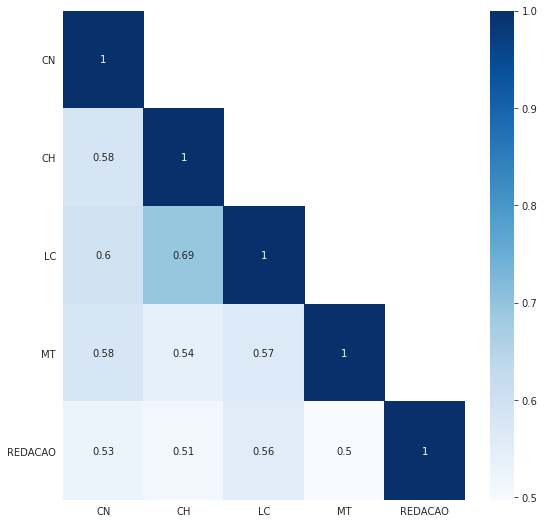

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,9))
mask = dados_treino.corr().where(np.tril(np.ones(dados_treino.corr().shape)).astype(np.bool))
#mask.values[[np.arange(mask.shape[0])]*2] = np.nan
sns.heatmap(mask, annot = True, linewidths=0, cmap='Blues', linecolor='Grey')
plt.yticks(rotation = 0)

Preparando o pipeline e definindo os hiperparâmetros:


In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=5,max_depth=5, n_jobs=-1, warm_start=True))
n_estimators = [100, 200]
max_depth = [5, 10]
min_samples_split = [2, 4]
min_samples_leaf = [1, 2] 
max_features = ['auto', 'sqrt']

hyperparameters = {'randomforestregressor__n_estimators': n_estimators, 'randomforestregressor__max_depth': max_depth,  
                                'randomforestregressor__min_samples_split': min_samples_split, 
                                'randomforestregressor__min_samples_leaf': min_samples_leaf}

In [0]:
model = GridSearchCV(pipeline, hyperparameters, cv=10)
model.fit(x_treino.values, y_treino.values.ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=5,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                               

Prevendo as notas do dataframe de teste e montando um dataframe com os valores e reas e suas previsões:

In [0]:
pred_notas = model.predict(x_teste)
comp = pd.DataFrame({'Real': y_teste.values.ravel(), 'Predict': pred_notas})
comp

,Real,Predict
0,550.0,530.163217
1,406.3,457.384053
2,652.3,653.484844
3,469.1,511.646249
4,580.5,554.262710
...,...,...
19995,464.3,463.845633
19996,509.5,470.943686
19997,548.6,519.954083
19998,496.0,546.324664


Calculando o erro quadrático médio(MSE):


In [0]:
mean_squared_error(comp['Real'], comp['Predict'])

2090.777499646081

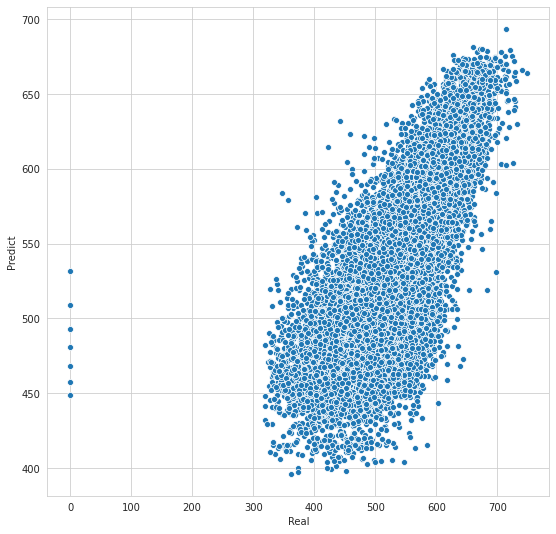

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=comp['Real'], y=comp['Predict'])

In [0]:
from google.colab import files

X_desafioqt = dados_desafioqt[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].to_numpy()
predicao_desafioqt = model.predict(X_desafioqt)

desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df['NU_NOTA_LC'] = predicao_desafioqt
desafio_df

desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')